# This time: trying with more columns dropped, and better cleaning the rows.

In [2]:
path = "Resources/Valve_Player_Data.csv"

import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np
from pprint import pprint
import time
import datetime
from dateutil.relativedelta import relativedelta

In [3]:
monthly_players = pd.read_csv(path)
monthly_players

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
0,September 2021,512350.92,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...,...
5266,December 2016,192.03,-21.90,-10.24%,405,https://steamcharts.com/app/435150,2016-12-01,Divinity: Original Sin 2
5267,November 2016,213.92,-134.68,-38.63%,537,https://steamcharts.com/app/435150,2016-11-01,Divinity: Original Sin 2
5268,October 2016,348.60,-201.75,-36.66%,1031,https://steamcharts.com/app/435150,2016-10-01,Divinity: Original Sin 2
5269,September 2016,550.36,543.26,+7654.89%,2836,https://steamcharts.com/app/435150,2016-09-01,Divinity: Original Sin 2


In [4]:
monthly_players.nunique()

Month_Year       111
Avg_players     5241
Gain            5135
Percent_Gain    3685
Peak_Players    4988
URL               98
Date             111
Game_Name         98
dtype: int64

In [5]:
monthly_players.dtypes

Month_Year       object
Avg_players     float64
Gain            float64
Percent_Gain     object
Peak_Players      int64
URL              object
Date             object
Game_Name        object
dtype: object

In [6]:
# EXTRACT AND TRANSFORM DATA

# drop first two months for every game as these extreme values will totally skew the data.

In [7]:
monthly_players.Game_Name.unique()

array(['Counter Strike: Global Offensive', 'Dota 2',
       'PUBG: Battlegrounds', 'Apex Legends', 'Team Fortress 2',
       'Grand Theft Auto V', 'NARAKA: BLADEPOINT', 'Wallpaper Engine',
       'Rust', 'Destiny 2', 'Warframe', 'Cookie Clicker',
       "Tom Clancy's Rainbow Six Seige", 'Football Manager 2021 ',
       'PAYDAY 2', 'ARK: Survival Evolved', 'Dead by Daylight',
       "Sid Meier's Civilization VI", 'MIR4', 'Unturned', 'Terraria',
       'War Thunder', 'Hearts of Iron IV', 'Battlefield V', 'Valheim',
       'World of Tanks Blitz', 'Dayz', 'Total War: WARHAMMER II',
       "Don't Starve Together", 'Euro Truck Simulator 2', 'Rocket League',
       "Garry's Mod", 'Monster Hunter: World', 'Stardew Valley',
       'FINAL FANTASY XIV Online', 'Bless Unleashed ',
       'The Witcher 3: Wild Hunt', '雀魂麻将(MahjongSoul)', 'RimWorld',
       'Red Dead Redemption 2', '7 Days to Die', 'Black Desert',
       'Cities: Skylines', "Sid Meier's Civilization V",
       'Farming Simulator 19',

In [8]:
ID_list = monthly_players.URL.unique()

In [9]:
for i in range(0,len(ID_list)):
    ID_list[i] = ID_list[i].replace('https://steamcharts.com/app/', '')
ID_list

array(['730', '570', '578080', '1172470', '440', '271590', '1203220',
       '431960', '252490', '1085660', '230410', '1454400', '359550',
       '1263850', '218620', '346110', '381210', '289070', '1623660',
       '304930', '105600', '236390', '394360', '1238810', '892970',
       '444200', '221100', '594570', '322330', '227300', '252950', '4000',
       '582010', '413150', '39210', '1254120', '292030', '1329410',
       '294100', '1174180', '251570', '582660', '255710', '8930',
       '787860', '489830', '281990', '306130', '550', '1293830', '236850',
       '480', '813780', '1184370', '601510', '250900', '513710', '377160',
       '427520', '261550', '1281930', '1644960', '960090', '291550',
       '438100', '1097150', '107410', '1100600', '552990', '1313860',
       '374320', '1158310', '835570', '275850', '1259970', '1172620',
       '10', '740130', '238960', '629520', '1091500', '1129580',
       '1222680', '739630', '1225330', '1049590', '453480', '594650',
       '526870', '322

In [10]:
# Strip the URL data off the app ID
url_list = monthly_players["URL"]
for i in range(0,len(url_list)):
    url_list[i] = url_list[i].replace('https://steamcharts.com/app/', '')

C:\Users\David\AppData\Local\Temp/ipykernel_15272/1115660068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  url_list[i] = url_list[i].replace('https://steamcharts.com/app/', '')


In [11]:
monthly_players = monthly_players.rename(columns={"URL": "APP"})
monthly_players

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,APP,Date,Game_Name
0,September 2021,512350.92,268.96,+0.05%,942519,730,2021-09-01,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.60,+1.19%,802544,730,2021-08-01,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.72,-7.88%,763523,730,2021-07-01,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.81,-16.75%,929940,730,2021-06-01,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.63,-8.77%,1087197,730,2021-05-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...,...
5266,December 2016,192.03,-21.90,-10.24%,405,435150,2016-12-01,Divinity: Original Sin 2
5267,November 2016,213.92,-134.68,-38.63%,537,435150,2016-11-01,Divinity: Original Sin 2
5268,October 2016,348.60,-201.75,-36.66%,1031,435150,2016-10-01,Divinity: Original Sin 2
5269,September 2016,550.36,543.26,+7654.89%,2836,435150,2016-09-01,Divinity: Original Sin 2


In [12]:
# split dataframe into relational dataframes
games = monthly_players[["APP", "Game_Name"]]
games = games.drop_duplicates().set_index("APP")
games

,Game_Name
APP,
730,Counter Strike: Global Offensive
570,Dota 2
578080,PUBG: Battlegrounds
1172470,Apex Legends
440,Team Fortress 2
...,...
1238840,Battlefield 1
239140,Dying Light
646570,Slay the Spire


In [13]:
reduced_players = monthly_players[["Percent_Gain", "APP", "Date", "Peak_Players"]]
reduced_players

,Percent_Gain,APP,Date,Peak_Players
0,+0.05%,730,2021-09-01,942519
1,+1.19%,730,2021-08-01,802544
2,-7.88%,730,2021-07-01,763523
3,-16.75%,730,2021-06-01,929940
4,-8.77%,730,2021-05-01,1087197
...,...,...,...,...
5266,-10.24%,435150,2016-12-01,405
5267,-38.63%,435150,2016-11-01,537
5268,-36.66%,435150,2016-10-01,1031
5269,+7654.89%,435150,2016-09-01,2836


## Remove bad rows

In [14]:
# I have noticed that bad rows often are due to test periods - when peak users < 100. So drop any test periods and 1 more row.
reduced_players = reduced_players[reduced_players.Peak_Players>100]
reduced_players

,Percent_Gain,APP,Date,Peak_Players
0,+0.05%,730,2021-09-01,942519
1,+1.19%,730,2021-08-01,802544
2,-7.88%,730,2021-07-01,763523
3,-16.75%,730,2021-06-01,929940
4,-8.77%,730,2021-05-01,1087197
...,...,...,...,...
5265,+7.41%,435150,2017-01-01,429
5266,-10.24%,435150,2016-12-01,405
5267,-38.63%,435150,2016-11-01,537
5268,-36.66%,435150,2016-10-01,1031


In [15]:
# Drop games with 1 or 2 rows; this is not enough data to extrapolate from, 
# as we will need to drop the first two months of a game's existence
game_id = reduced_players.APP.value_counts()
print(game_id)
clean_ID_list = []

for i in range(0,len(game_id)):
    if (game_id.index[i] =='480'):
        print(f"{game_id.index[i]} found - this game must be excluded as it is for test purposes only")
    # 480 is a secret test game with no news feed - it must also be removed.
    elif game_id[i] > 2:
        clean_ID_list.append(game_id.index[i])
        print(f"adding {game_id.index[i]} with {game_id[i]} rows")
    else:
        print(f"removing {games.loc[game_id.index[i]]}(app ID {game_id.index[i]}) due to having too few months of data")
        
len(clean_ID_list)

730        111
10         111
550        111
570        111
4000       111
          ... 
1254120      2
740130       1
1644960      1
1184370      1
1454400      1
Name: APP, Length: 98, dtype: int64
adding 730 with 111 rows
adding 10 with 111 rows
adding 550 with 111 rows
adding 570 with 111 rows
adding 4000 with 111 rows
adding 105600 with 111 rows
adding 8930 with 111 rows
adding 440 with 111 rows
adding 227300 with 105 rows
480 found - this game must be excluded as it is for test purposes only
adding 230410 with 103 rows
adding 107410 with 103 rows
adding 236390 with 98 rows
adding 236850 with 98 rows
adding 218620 with 98 rows
adding 238960 with 96 rows
adding 221100 with 94 rows
adding 252490 with 94 rows
adding 251570 with 94 rows
adding 39210 with 92 rows
adding 304930 with 87 rows
adding 306130 with 87 rows
adding 291550 with 83 rows
adding 250900 with 83 rows
adding 322330 with 82 rows
adding 322170 with 82 rows
adding 239140 with 80 rows
adding 255710 with 79 rows
adding 27

90

In [16]:
# drop bottom row of each app, as the initial months feature unusable data (NaN, or extreme outlier due to percentage calculation)
temp_df =pd.DataFrame(columns = reduced_players.columns)

for ID in clean_ID_list:
    df = reduced_players[reduced_players.APP == ID]
    df = df.reset_index(drop=True)
    print(df)
    df = df.drop(len(df)-1)
    df = df.drop(len(df)-1)
    print(df)
    temp_df = pd.concat([temp_df, df], ignore_index=True)
reduced_players = temp_df

    Percent_Gain  APP        Date  Peak_Players
0         +0.05%  730  2021-09-01        942519
1         +1.19%  730  2021-08-01        802544
2         -7.88%  730  2021-07-01        763523
3        -16.75%  730  2021-06-01        929940
4         -8.77%  730  2021-05-01       1087197
..           ...  ...         ...           ...
106      +31.61%  730  2012-11-01         50533
107      -32.88%  730  2012-10-01         20850
108       +3.39%  730  2012-09-01         36057
109    +1559.43%  730  2012-08-01         52261
110          NaN  730  2012-07-01          1642

[111 rows x 4 columns]
    Percent_Gain  APP        Date  Peak_Players
0         +0.05%  730  2021-09-01        942519
1         +1.19%  730  2021-08-01        802544
2         -7.88%  730  2021-07-01        763523
3        -16.75%  730  2021-06-01        929940
4         -8.77%  730  2021-05-01       1087197
..           ...  ...         ...           ...
104      +14.81%  730  2013-01-01         31359
105       -0.39%

[103 rows x 4 columns]
    Percent_Gain     APP        Date  Peak_Players
0         -2.06%  107410  2021-09-01         25623
1         +2.00%  107410  2021-08-01         23447
2         -6.09%  107410  2021-07-01         23244
3        -20.84%  107410  2021-06-01         26135
4        +30.70%  107410  2021-05-01         37235
..           ...     ...         ...           ...
96       +70.39%  107410  2013-09-01         16612
97        +8.82%  107410  2013-08-01          6657
98        -1.41%  107410  2013-07-01          7311
99       +77.11%  107410  2013-06-01         12108
100      -14.77%  107410  2013-05-01          3496

[101 rows x 4 columns]
    Percent_Gain     APP        Date  Peak_Players
0         +2.41%  236390  2021-09-01         43439
1         +6.89%  236390  2021-08-01         38188
2         -7.52%  236390  2021-07-01         33676
3         -2.62%  236390  2021-06-01         39776
4         -8.29%  236390  2021-05-01         40505
..           ...     ...         ..

[87 rows x 4 columns]
   Percent_Gain     APP        Date  Peak_Players
0        -1.03%  304930  2021-09-01         33682
1        +0.29%  304930  2021-08-01         34139
2        +5.02%  304930  2021-07-01         36802
3        +1.61%  304930  2021-06-01         32713
4        +6.99%  304930  2021-05-01         33759
..          ...     ...         ...           ...
80       +0.07%  304930  2015-01-01         18529
81       +9.56%  304930  2014-12-01         16702
82      -13.55%  304930  2014-11-01         16744
83      -31.15%  304930  2014-10-01         20208
84      -55.92%  304930  2014-09-01         28228

[85 rows x 4 columns]
   Percent_Gain     APP        Date  Peak_Players
0       -13.14%  306130  2021-09-01         29507
1        +2.98%  306130  2021-08-01         35630
2       -11.86%  306130  2021-07-01         31391
3       +12.14%  306130  2021-06-01         39789
4       -18.82%  306130  2021-05-01         31115
..          ...     ...         ...           ...
82   

[78 rows x 4 columns]
   Percent_Gain     APP        Date  Peak_Players
0       -31.68%  271590  2021-09-01        151408
1        +5.23%  271590  2021-08-01        214591
2       +27.08%  271590  2021-07-01        218784
3        +4.91%  271590  2021-06-01        155599
4        -8.52%  271590  2021-05-01        146011
..          ...     ...         ...           ...
71      +21.81%  271590  2015-10-01         73902
72      -17.89%  271590  2015-09-01         46917
73      -17.90%  271590  2015-08-01         50693
74      -19.80%  271590  2015-07-01         60908
75      -49.71%  271590  2015-06-01         85195

[76 rows x 4 columns]
   Percent_Gain     APP        Date  Peak_Players
0        +7.84%  292030  2021-09-01         44434
1        -8.15%  292030  2021-08-01         44132
2       +13.92%  292030  2021-07-01         38753
3        +3.75%  292030  2021-06-01         34733
4       -10.67%  292030  2021-05-01         41446
..          ...     ...         ...           ...
72   

[66 rows x 4 columns]
   Percent_Gain     APP        Date  Peak_Players
0       -17.28%  374320  2021-09-01         14879
1       -21.53%  374320  2021-08-01         16708
2       +13.87%  374320  2021-07-01         23540
3       +27.98%  374320  2021-06-01         25058
4       -14.06%  374320  2021-05-01         15766
..          ...     ...         ...           ...
59      +55.95%  374320  2016-10-01         32421
60       +3.24%  374320  2016-09-01          9644
61      -16.93%  374320  2016-08-01         11349
62      -29.95%  374320  2016-07-01         12211
63      -65.22%  374320  2016-06-01         18641

[64 rows x 4 columns]
   Percent_Gain     APP        Date  Peak_Players
0       +20.80%  281990  2021-09-01         31650
1        -8.59%  281990  2021-08-01         17028
2        -2.37%  281990  2021-07-01         19577
3       -30.42%  281990  2021-06-01         19976
4       -16.69%  281990  2021-05-01         32520
..          ...     ...         ...           ...
60   

59          NaN  289070  2016-10-01        162314
   Percent_Gain     APP        Date  Peak_Players
0       +22.92%  289070  2021-09-01         71565
1       -10.77%  289070  2021-08-01         49218
2       +18.82%  289070  2021-07-01         65677
3        -4.21%  289070  2021-06-01         45842
4       -11.56%  289070  2021-05-01         49509
5        +1.62%  289070  2021-04-01         59532
6       -17.46%  289070  2021-03-01         64220
7       +13.57%  289070  2021-02-01         68161
8       +11.93%  289070  2021-01-01         65951
9        -3.33%  289070  2020-12-01         55126
10       +4.47%  289070  2020-11-01         53338
11       +4.35%  289070  2020-10-01         54203
12       -7.63%  289070  2020-09-01         54546
13      -10.45%  289070  2020-08-01         53037
14       -5.41%  289070  2020-07-01         64392
15       -4.77%  289070  2020-06-01         60936
16       -4.05%  289070  2020-05-01         76439
17      +21.55%  289070  2020-04-01         70298


46   +16572.04%  646570  2017-11-01           186
   Percent_Gain     APP        Date  Peak_Players
0       -11.37%  646570  2021-09-01          9160
1        +5.69%  646570  2021-08-01         10843
2       +19.56%  646570  2021-07-01         10831
3        +9.21%  646570  2021-06-01         10381
4        +0.07%  646570  2021-05-01          7222
5       -13.66%  646570  2021-04-01          7304
6       -15.47%  646570  2021-03-01          8773
7        -7.75%  646570  2021-02-01         10380
8       +11.34%  646570  2021-01-01         11077
9       +18.56%  646570  2020-12-01         10297
10       +7.55%  646570  2020-11-01          9696
11       +3.71%  646570  2020-10-01         10695
12      -15.66%  646570  2020-09-01          7895
13       -0.47%  646570  2020-08-01          9584
14      +18.71%  646570  2020-07-01          9621
15      -11.45%  646570  2020-06-01          9030
16      -12.00%  646570  2020-05-01          7994
17      -11.28%  646570  2020-04-01         14267


21      -14.62%  1085660  2019-12-01        138593
   Percent_Gain      APP        Date  Peak_Players
0        -8.09%  1100600  2021-09-01         14283
1        +1.33%  1100600  2021-08-01         15128
2        -7.94%  1100600  2021-07-01         15214
3       -10.79%  1100600  2021-06-01         17073
4        -3.90%  1100600  2021-05-01         19024
5        -8.54%  1100600  2021-04-01         20409
6       -15.01%  1100600  2021-03-01         21872
7       -12.23%  1100600  2021-02-01         26960
8       -11.46%  1100600  2021-01-01         29457
9       -39.58%  1100600  2020-12-01         34927
10      -29.37%  1100600  2020-11-01         70129
11      -14.67%  1100600  2020-10-01         84129
12       -6.67%  1100600  2020-09-01         87558
13       +2.40%  1100600  2020-08-01         94464
14       +1.51%  1100600  2020-07-01         91382
15      -16.18%  1100600  2020-06-01         94063
16      -14.81%  1100600  2020-05-01        123114
17       +6.79%  1100600  2020-

15          NaN  1172620  2020-06-01         66632
   Percent_Gain      APP        Date  Peak_Players
0        -7.39%  1172620  2021-09-01         25817
1       -48.84%  1172620  2021-08-01         19422
2       -11.06%  1172620  2021-07-01         50314
3       +81.27%  1172620  2021-06-01         62889
4       -27.69%  1172620  2021-05-01         43761
5       +74.02%  1172620  2021-04-01         46670
6       -28.95%  1172620  2021-03-01         22070
7       -30.09%  1172620  2021-02-01         27909
8       +62.68%  1172620  2021-01-01         52916
9       +23.92%  1172620  2020-12-01         45381
10      +70.63%  1172620  2020-11-01         27087
11      -35.27%  1172620  2020-10-01         13235
12      -21.66%  1172620  2020-09-01         26959
13      -43.33%  1172620  2020-08-01         29221
   Percent_Gain      APP        Date  Peak_Players
0       +16.74%  1329410  2021-09-01         22213
1       +92.86%  1329410  2021-08-01         20920
2        -5.01%  1329410  2021-

7      -69.93%  1091500  2021-02-01         47115
  Percent_Gain      APP        Date  Peak_Players
0      -31.25%  1366540  2021-09-01          7534
1      -10.66%  1366540  2021-08-01         11996
2       -6.40%  1366540  2021-07-01         12895
3       +9.94%  1366540  2021-06-01         15073
4       -7.65%  1366540  2021-05-01         15455
5      -48.70%  1366540  2021-04-01         14543
6      -53.06%  1366540  2021-03-01         33242
7      +24.63%  1366540  2021-02-01         59243
8          NaN  1366540  2021-01-01         59339
  Percent_Gain      APP        Date  Peak_Players
0      -31.25%  1366540  2021-09-01          7534
1      -10.66%  1366540  2021-08-01         11996
2       -6.40%  1366540  2021-07-01         12895
3       +9.94%  1366540  2021-06-01         15073
4       -7.65%  1366540  2021-05-01         15455
5      -48.70%  1366540  2021-04-01         14543
6      -53.06%  1366540  2021-03-01         33242
  Percent_Gain     APP        Date  Peak_Players
0

In [17]:
# drop the peak players column
reduced_players = reduced_players.drop(columns=["Peak_Players"])
# reprint the cleaned up reduced_players
reduced_players

# nb: perhaps the above cleaning process could have been done in one step by simply catching and handling errors?

,Percent_Gain,APP,Date
0,+0.05%,730,2021-09-01
1,+1.19%,730,2021-08-01
2,-7.88%,730,2021-07-01
3,-16.75%,730,2021-06-01
4,-8.77%,730,2021-05-01
...,...,...,...
4857,-3.43%,1293830,2021-09-01
4858,-47.45%,1293830,2021-08-01
4859,+68.25%,1293830,2021-07-01
4860,+17.89%,1293830,2021-06-01


## Fix Datatypes


In [18]:
# strip off the percent symbol and convert it into a float
percentages = reduced_players["Percent_Gain"]
for i in range(0, len(reduced_players)):
    try:
        reduced_players.loc[i, "Percent_Gain"] = float(reduced_players.loc[i, "Percent_Gain"].replace("%",""))
    except AttributeError as e:
        app = reduced_players.loc[i, "APP"]
        print(f"error on app id {app}")
        print(e)

print(reduced_players.dtypes)

Percent_Gain    object
APP             object
Date            object
dtype: object


In [19]:
reduced_players

,Percent_Gain,APP,Date
0,0.05,730,2021-09-01
1,1.19,730,2021-08-01
2,-7.88,730,2021-07-01
3,-16.75,730,2021-06-01
4,-8.77,730,2021-05-01
...,...,...,...
4857,-3.43,1293830,2021-09-01
4858,-47.45,1293830,2021-08-01
4859,68.25,1293830,2021-07-01
4860,17.89,1293830,2021-06-01


In [20]:
# check all percent values are now floats:
for i in range (0,len(reduced_players)):
    if(type(reduced_players.loc[i][0]) != float):
        print("non-float found")

In [21]:
# we can keep APP as a str as we don't want to be using it to make any predictions.

In [22]:
# convert 'Date' to true date-time format
for i in range (0,len(reduced_players)):
    reduced_players.loc[i][2] = pd.to_datetime(reduced_players.loc[i][2])

In [23]:
reduced_players

,Percent_Gain,APP,Date
0,0.05,730,2021-09-01 00:00:00
1,1.19,730,2021-08-01 00:00:00
2,-7.88,730,2021-07-01 00:00:00
3,-16.75,730,2021-06-01 00:00:00
4,-8.77,730,2021-05-01 00:00:00
...,...,...,...
4857,-3.43,1293830,2021-09-01 00:00:00
4858,-47.45,1293830,2021-08-01 00:00:00
4859,68.25,1293830,2021-07-01 00:00:00
4860,17.89,1293830,2021-06-01 00:00:00


## Read in news data

In [24]:
# this time, I am going to wrap the whole thing in a for loop, to do a separate call for each game.

Monthly_data_cleaned_joined = pd.DataFrame()

for app_no in clean_ID_list:
    print(f"*** new app:{app_no}, number {clean_ID_list.index(app_no)} of {len(clean_ID_list)-1} ***")
    current_df = reduced_players[reduced_players.APP == app_no]
    current_df = current_df.reset_index(drop=True)
#     print(current_df)
    
    # build dataframe from json data and reduce to relevant columns

    # call for just one news item
    count = 1
    max_length = 1024
    api_url = f"http://api.steampowered.com/ISteamNews/GetNewsForApp/v0002/?appid={app_no}&count={count}&maxlength={max_length}&format=json"
    news_response = requests.get(api_url).json()

    # find out how many news items for this app, and then recall news items.
    count = news_response['appnews']['count']
    api_url = f"http://api.steampowered.com/ISteamNews/GetNewsForApp/v0002/?appid={app_no}&count={count}&maxlength={max_length}&format=json"
    news_response = requests.get(api_url).json()
    
    # new DF to store response
    newsDF = pd.DataFrame(columns=['Date', 'Label'])

    # get the date and label of each news item; we can ignore the actual text of the news item on this first approach.
    for item in (news_response['appnews']['newsitems']):
        # convert unix date to yyy-mm-dd
#         print(f"{pd.to_datetime(item['date'], unit='s')} {item['feedlabel']}")
        row = pd.DataFrame(data={'Date': [pd.to_datetime(item['date'], unit='s')], 'Label': [item['feedlabel']]})
        newsDF = pd.concat([newsDF, row])
    
    #reset the index and print out the important values from the dataframe
    newsDF = newsDF.reset_index(drop=True)
#     print(newsDF)
    print(newsDF.nunique())
    print(newsDF.Label.value_counts())
    
    # add new label columns (if any) to the dataframe
    labels_index = newsDF.Label.value_counts().index
    for column in labels_index:
        current_df[column] = 0
    current_df
#     print(current_df)
    
    # bin news feed into monthly groups
    for i in range(0, len(current_df)):
        # set start and end dates for the current month
        start_date = current_df.loc[i, 'Date']
        end_date = start_date + relativedelta(months = 1)
#         print(f"{start_date}, {end_date}")
        #identify rows from the newsDF that fall into that category
        for j in range(0, len(newsDF)):
            if ((newsDF.loc[j, 'Date'] >= start_date) & (newsDF.loc[j, 'Date'] < end_date)):
                # find the relevant label and increment that column on the overall grid
                feed_type = newsDF.loc[j, 'Label']
#                 print(feed_type)
                current_df.loc[i, feed_type] += 1
    Monthly_data_cleaned_joined = pd.concat([Monthly_data_cleaned_joined, current_df], ignore_index=True)

*** new app:730, number 0 of 89 ***
Date     1265
Label      12
dtype: int64
PC Gamer                   434
Rock, Paper, Shotgun       259
The Loadout                150
Community Announcements    138
SteamDB                    127
PCGamesN                    79
Product Update              72
Eurogamer                   23
GamingOnLinux               15
Announcement                 9
Kotaku                       6
Product Release              3
Name: Label, dtype: int64
*** new app:10, number 1 of 89 ***
Date     237
Label      8
dtype: int64
PC Gamer                   118
Community Announcements     65
Kotaku                      43
Rock, Paper, Shotgun        37
Eurogamer                    5
Product Update               2
GamingOnLinux                1
Shacknews                    1
Name: Label, dtype: int64
*** new app:550, number 2 of 89 ***
Date     812
Label     13
dtype: int64
L4D Blog                   272
Community Announcements    268
Product Update             165
PC Gamer 

*** new app:291550, number 21 of 89 ***
Date     493
Label      5
dtype: int64
Community Announcements    707
Rock, Paper, Shotgun         7
PC Gamer                     4
Eurogamer                    1
Product Release              1
Name: Label, dtype: int64
*** new app:250900, number 22 of 89 ***
Date     109
Label      5
dtype: int64
Community Announcements    57
Rock, Paper, Shotgun       49
Product Release             5
Announcement                4
Eurogamer                   2
Name: Label, dtype: int64
*** new app:322330, number 23 of 89 ***
Date     386
Label      5
dtype: int64
Community Announcements    541
GamingOnLinux               10
Announcement                 4
Rock, Paper, Shotgun         3
Product Release              1
Name: Label, dtype: int64
*** new app:322170, number 24 of 89 ***
Date     27
Label     3
dtype: int64
Community Announcements    47
Rock, Paper, Shotgun        1
Announcement                1
Name: Label, dtype: int64
*** new app:239140, number 25 of

*** new app:431960, number 46 of 89 ***
Date     68
Label     3
dtype: int64
Community Announcements    92
Rock, Paper, Shotgun        4
SteamDB                     1
Name: Label, dtype: int64
*** new app:457140, number 47 of 89 ***
Date     190
Label      7
dtype: int64
Community Announcements    171
Rock, Paper, Shotgun        32
GamingOnLinux                9
PC Gamer                     7
Eurogamer                    3
Product Release              3
Announcement                 2
Name: Label, dtype: int64
*** new app:578080, number 48 of 89 ***
Date     1633
Label      10
dtype: int64
Community Announcements    596
Rock, Paper, Shotgun       420
PC Gamer                   388
Eurogamer                  135
PCGamesN                    99
The Loadout                 57
SteamDB                      9
VG247                        4
Product Release              2
Shacknews                    1
Name: Label, dtype: int64
*** new app:582660, number 49 of 89 ***
Date     743
Label      6
dt

Date     410
Label      9
dtype: int64
Community Announcements    274
PCGamesN                    52
Strategy Gamer              23
Rock, Paper, Shotgun        21
GamingOnLinux               16
Eurogamer                   15
Gamemag.ru                   9
SteamDB                      1
pressakey.com                1
Name: Label, dtype: int64
*** new app:1129580, number 79 of 89 ***
Date     155
Label      3
dtype: int64
Community Announcements    152
SteamDB                      2
PC Gamer                     1
Name: Label, dtype: int64
*** new app:1225330, number 80 of 89 ***
Date     25
Label     4
dtype: int64
Community Announcements    13
Gamemag.ru                 10
PCGamesN                    1
Eurogamer                   1
Name: Label, dtype: int64
*** new app:1049590, number 81 of 89 ***
Date     1119
Label       1
dtype: int64
Community Announcements    1119
Name: Label, dtype: int64
*** new app:1313860, number 82 of 89 ***
Date     193
Label      6
dtype: int64
Community Ann

In [25]:
Monthly_data_cleaned_joined.APP.value_counts()

730        109
105600     109
440        109
8930       109
10         109
          ... 
1172470      9
1091500      8
1366540      7
892970       6
1293830      5
Name: APP, Length: 90, dtype: int64

In [26]:
# back-up method so that above cell does not have to be ran again in case of reset.
safe_backup_df = Monthly_data_cleaned_joined
# Monthly_data_cleaned_joined = safe_backup_df

In [27]:
Monthly_data_cleaned_joined = Monthly_data_cleaned_joined.fillna(0)

In [28]:
# add binary target: positive or negative change
# 1 for positive, 0 for negative
Monthly_data_cleaned_joined["Binary_outcome"] = 0
Monthly_data_cleaned_joined

,Percent_Gain,APP,Date,PC Gamer,"Rock, Paper, Shotgun",The Loadout,Community Announcements,SteamDB,PCGamesN,Product Update,...,Dota Beta Blog,Dota Blog,Press Release,Client Update,TF2 Blog,Wargamer.com,Strategy Gamer,Gamemag.ru,pressakey.com,Binary_outcome
0,0.05,730,2021-09-01,2.0,1.0,1.0,2,8.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.19,730,2021-08-01,0.0,1.0,1.0,1,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-7.88,730,2021-07-01,3.0,1.0,3.0,2,4.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-16.75,730,2021-06-01,1.0,0.0,3.0,1,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-8.77,730,2021-05-01,0.0,2.0,0.0,4,7.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,-3.43,1293830,2021-09-01,0.0,0.0,0.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4858,-47.45,1293830,2021-08-01,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4859,68.25,1293830,2021-07-01,0.0,0.0,0.0,0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4860,17.89,1293830,2021-06-01,0.0,0.0,0.0,4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [29]:
for i in range (0, len(Monthly_data_cleaned_joined)):
    if (Monthly_data_cleaned_joined.loc[i, 'Percent_Gain'] > 0):
        Monthly_data_cleaned_joined.loc[i, 'Binary_outcome'] = 1
    elif (Monthly_data_cleaned_joined.loc[i, 'Percent_Gain'] < 0):
        Monthly_data_cleaned_joined.loc[i, 'Binary_outcome'] = 0
    else:
        print("this should never be printed; true 0 found")

Monthly_data_cleaned_joined

,Percent_Gain,APP,Date,PC Gamer,"Rock, Paper, Shotgun",The Loadout,Community Announcements,SteamDB,PCGamesN,Product Update,...,Dota Beta Blog,Dota Blog,Press Release,Client Update,TF2 Blog,Wargamer.com,Strategy Gamer,Gamemag.ru,pressakey.com,Binary_outcome
0,0.05,730,2021-09-01,2.0,1.0,1.0,2,8.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.19,730,2021-08-01,0.0,1.0,1.0,1,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-7.88,730,2021-07-01,3.0,1.0,3.0,2,4.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-16.75,730,2021-06-01,1.0,0.0,3.0,1,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-8.77,730,2021-05-01,0.0,2.0,0.0,4,7.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,-3.43,1293830,2021-09-01,0.0,0.0,0.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4858,-47.45,1293830,2021-08-01,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4859,68.25,1293830,2021-07-01,0.0,0.0,0.0,0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4860,17.89,1293830,2021-06-01,0.0,0.0,0.0,4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [30]:
# drop non-numerical data
Monthly_data_cleaned_joined_dropped = Monthly_data_cleaned_joined.drop(columns=['APP','Date', 'Percent_Gain'])

In [31]:
monthly_sum = Monthly_data_cleaned_joined_dropped.sum()
monthly_sum

PC Gamer                    4525.0
Rock, Paper, Shotgun        4253.0
The Loadout                  475.0
Community Announcements    26165.0
SteamDB                      587.0
PCGamesN                    1198.0
Product Update              1193.0
Eurogamer                    946.0
GamingOnLinux                136.0
Announcement                 166.0
Kotaku                        49.0
Product Release              102.0
Shacknews                    103.0
L4D Blog                      99.0
VG247                         24.0
Dota Beta Blog                 0.0
Dota Blog                      0.0
Press Release                  2.0
Client Update                  1.0
TF2 Blog                     767.0
Wargamer.com                  10.0
Strategy Gamer               137.0
Gamemag.ru                   138.0
pressakey.com                  5.0
Binary_outcome              2398.0
dtype: float64

In [32]:
monthly_sum[0]

4525.0

In [33]:
Monthly_data_cleaned_joined_dropped.sum().describe()

count       25.000000
mean      1739.160000
std       5237.421294
min          0.000000
25%         24.000000
50%        137.000000
75%        946.000000
max      26165.000000
dtype: float64

In [34]:
# drop any cloumns with fewer than 50 updates
drop_list = []

for i in range(0,len(monthly_sum)):
    if monthly_sum[i] < 50:
        drop_list.append(monthly_sum.index[i])
        print(f"removing news source {monthly_sum.index[i]} due to having too few mentions")
        

Monthly_data_cleaned_joined_dropped = Monthly_data_cleaned_joined_dropped.drop(columns=drop_list)

removing news source Kotaku due to having too few mentions
removing news source VG247 due to having too few mentions
removing news source Dota Beta Blog due to having too few mentions
removing news source Dota Blog due to having too few mentions
removing news source Press Release due to having too few mentions
removing news source Client Update due to having too few mentions
removing news source Wargamer.com due to having too few mentions
removing news source pressakey.com due to having too few mentions


In [35]:
# remove game-specific blogs: L4D and TF2
Monthly_data_cleaned_joined_dropped = Monthly_data_cleaned_joined_dropped.drop(columns=['TF2 Blog', 'L4D Blog'])

In [36]:
Monthly_data_cleaned_joined_dropped

,PC Gamer,"Rock, Paper, Shotgun",The Loadout,Community Announcements,SteamDB,PCGamesN,Product Update,Eurogamer,GamingOnLinux,Announcement,Product Release,Shacknews,Strategy Gamer,Gamemag.ru,Binary_outcome
0,2.0,1.0,1.0,2,8.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,1.0,1.0,1,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,3.0,1.0,3.0,2,4.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,3.0,1,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,2.0,0.0,4,7.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4858,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4859,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4860,0.0,0.0,0.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Machine Learning

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

path = "Resources/myopia.csv"
from pathlib import Path


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

### supervised

In [38]:
# make the choice of randomiser explicit:
sample_hold = 42

In [39]:
Monthly_data_cleaned_joined_dropped.shape

(4862, 15)

In [40]:
Monthly_data_cleaned_joined_dropped

,PC Gamer,"Rock, Paper, Shotgun",The Loadout,Community Announcements,SteamDB,PCGamesN,Product Update,Eurogamer,GamingOnLinux,Announcement,Product Release,Shacknews,Strategy Gamer,Gamemag.ru,Binary_outcome
0,2.0,1.0,1.0,2,8.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,1.0,1.0,1,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,3.0,1.0,3.0,2,4.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,3.0,1,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,2.0,0.0,4,7.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4858,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4859,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4860,0.0,0.0,0.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [41]:
# Split the data into X_train, X_test, y_train, y_test
y = Monthly_data_cleaned_joined_dropped['Binary_outcome']

X = Monthly_data_cleaned_joined_dropped.drop(columns=['Binary_outcome'])


print("Shape: ", X.shape, y.shape)



Shape:  (4862, 14) (4862,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=sample_hold)

In [43]:
X_train

,PC Gamer,"Rock, Paper, Shotgun",The Loadout,Community Announcements,SteamDB,PCGamesN,Product Update,Eurogamer,GamingOnLinux,Announcement,Product Release,Shacknews,Strategy Gamer,Gamemag.ru
4450,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4111,2.0,3.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2328,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3271,0.0,0.0,0.0,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3092,0.0,0.0,0.0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3772,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [45]:
# Train a Logistic Regression model print the model score
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)



LogisticRegression()

In [65]:
classifier.coef_[0]
pd.Series(abs(classifier.coef_[0]), index=X_train.columns).sort_values()

Eurogamer                  0.006577
Strategy Gamer             0.009272
Product Update             0.013039
PC Gamer                   0.014628
SteamDB                    0.020591
The Loadout                0.022718
Community Announcements    0.030637
GamingOnLinux              0.041353
Shacknews                  0.053001
PCGamesN                   0.054589
Rock, Paper, Shotgun       0.086076
Product Release            0.091978
Gamemag.ru                 0.110348
Announcement               0.198093
dtype: float64

In [46]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")



Training Data Score: 0.5422380691168404
Testing Data Score: 0.5254934210526315


In [47]:
target_names = ["0", "1"]

In [48]:
clf = RandomForestClassifier(random_state=sample_hold).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')



              precision    recall  f1-score   support

           0       0.52      0.57      0.54       612
           1       0.52      0.46      0.49       604

    accuracy                           0.52      1216
   macro avg       0.52      0.52      0.52      1216
weighted avg       0.52      0.52      0.52      1216

Training Score: 0.7021393307734504
Testing Score: 0.5180921052631579


In [49]:
clf.predict(X_train)

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [55]:
print(classification_report(y_test, clf.predict_proba(X_test)[:,1] >= 0.6))

              precision    recall  f1-score   support

           0       0.53      0.86      0.65       612
           1       0.60      0.22      0.32       604

    accuracy                           0.54      1216
   macro avg       0.57      0.54      0.49      1216
weighted avg       0.57      0.54      0.49      1216



# not significantly better than random.

In [56]:
from sklearn.metrics import precision_recall_curve


In [57]:
p, r, t = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])
p

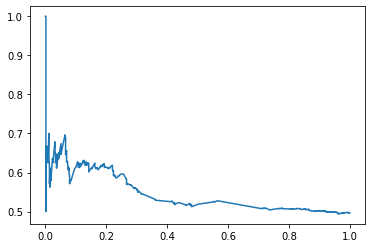

In [60]:
plt.plot(r, p)

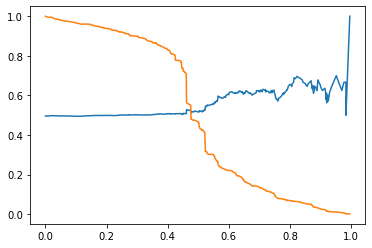

In [59]:
plt.plot( t, p[:-1])
plt.plot( t, r[:-1])

### artificial neural network

In [85]:
input_dimensions=X.shape[1]
input_dimensions

14

In [86]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=input_dimensions))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=100,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [87]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    overwrite=True,
    max_epochs=20,
    hyperband_iterations=2,)

In [88]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 53 Complete [00h 00m 07s]
val_accuracy: 0.5394737124443054

Best val_accuracy So Far: 0.5485197305679321
Total elapsed time: 00h 04m 21s

Search: Running Trial #54

Value             |Best Value So Far |Hyperparameter
relu              |tanh              |activation
16                |21                |first_units
4                 |4                 |num_layers
11                |41                |units_0
86                |66                |units_1
1                 |81                |units_2
91                |51                |units_3
91                |46                |units_4
7                 |20                |tuner/epochs
0                 |0                 |tuner/initial_epoch
1                 |0                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/7
114/114 [==============================] - 2s 5ms/step - loss: 0.6933 - accuracy: 0.5049 - val_loss: 0.6932 - val_accuracy: 0.5033
Epoch 2/7
114/114 [==========================

KeyboardInterrupt: 

### Search has still not yielded anything higher than 55% accuracy. 
#### The further cleaning has not improved the results.